In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [2]:
preprocessed_file_path = ('/Users/sanjuktabaruah/University_at_Buffalo/personal_project/genomic/colorectal_cancer/Colorectal_carcinoma/code 2/preprocessed_joined_df.csv')
patient_df = pd.read_csv(preprocessed_file_path)

patient_df.head().T

,0,1,2,3,4
SEX,0,1,1,0,0
HISTORY_OF_CANCER,0,0,0,1,0
VITAL_STATUS,1,1,1,0,1
OS_STATUS,1,1,1,0,1
DSS_STATUS,1,1,0,0,1
...,...,...,...,...,...
ICRSCORE,5.541343,4.817556,7.909826,6.577636,7.37415
MBR_SCORE,0.056723,0.070731,0.161886,-0.353789,0.327006
MICROSCORE,0.0,0.0,0.0,1.0,0.0
TMB_NONSYNONYMOUS,5.233333,2.766667,2.766667,2.433333,3.6


In [3]:
df_recur = patient_df[patient_df["PFS_STATUS_1:Recurred"] == True]
df_non_recur = patient_df[patient_df["PFS_STATUS_0:DiseaseFree"] == True]
print(f"Recurrence df: {df_recur.shape}, Non-recurrence df: {df_non_recur.shape}")

Recurrence df: (109, 90), Non-recurrence df: (239, 90)


In [4]:
df_recur["PFS_MONTHS"].sort_values().reset_index(drop=True)

0        0.16
1        0.72
2        0.79
3        1.02
4        1.02
        ...  
104     51.68
105     52.11
106     52.86
107     74.22
108    201.14
Name: PFS_MONTHS, Length: 109, dtype: float64

<Axes: >

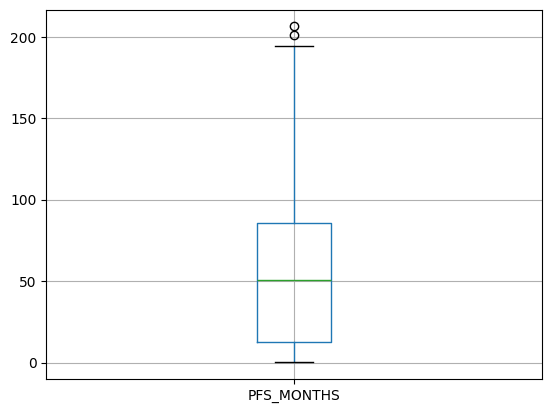

In [5]:
patient_df.boxplot(column = ["PFS_MONTHS"], grid = True)

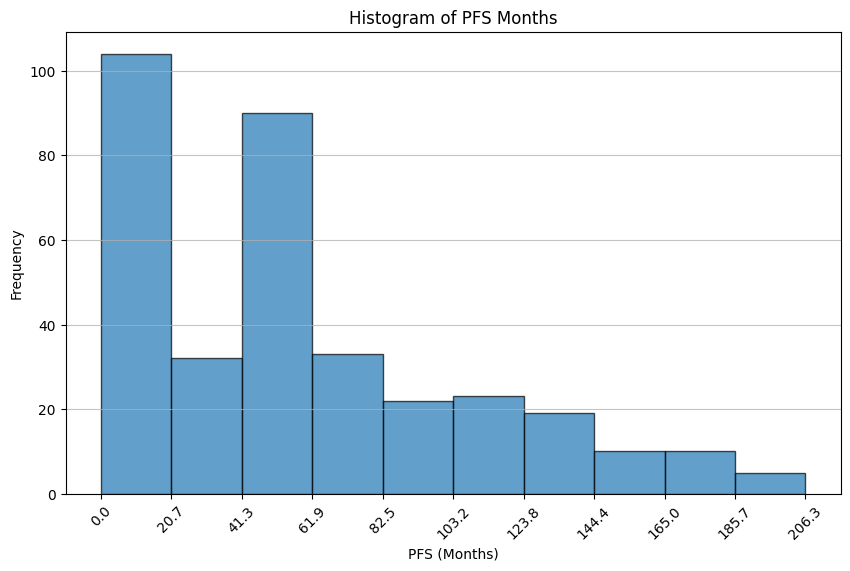

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(patient_df['PFS_MONTHS'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of PFS Months')
plt.xlabel('PFS (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Define the number of bins
num_bins = 10

# Calculate the bin edges
bin_edges = np.linspace(patient_df['PFS_MONTHS'].min(), patient_df['PFS_MONTHS'].max(), num_bins + 1)

plt.xticks(bin_edges, rotation=45)

plt.show()

### Calculate the bin edges

In [7]:
def calculate_bin_edges(data, num_bins):
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate the number of samples per bin
    samples_per_bin = len(sorted_data) // num_bins

    # Initialize an empty list for bin edges
    bin_edges = []

    # Determine the bin edges
    for i in range(num_bins):
        edge_value = sorted_data[i * samples_per_bin]
        bin_edges.append(edge_value)

    # Append the last value of the sorted data to the list of bin edges
    bin_edges.append(sorted_data[-1])

    # Plot the histogram
    counts, bins, patches = plt.hist(data, bins=bin_edges, edgecolor='black', rwidth=0.97)
    plt.title('Histogram with Bins')
    plt.xlabel('PFS Months')
    plt.ylabel('No. of observations')

    # Set y-ticks based on the counts
    plt.yticks(np.arange(0, max(counts) + 1, step=max(counts) // num_bins))

    plt.xticks(bin_edges, rotation=45)
    plt.show()

    # Print bin intervals and counts
    for i in range(len(bin_edges) - 1):
        bin_interval = f"{bin_edges[i]} to {bin_edges[i+1]}"
        bin_count = counts[i]
        print(f"Bin {i+1}: Interval = {bin_interval}, Count = {bin_count}")

    return bin_edges

### Assign class labels

In [8]:

def assign_class_labels(data, bin_edges):
    # Initialize an array to store class labels
    class_labels = np.zeros(len(data), dtype=int)

    # Assign class labels based on bin edges
    for i in range(len(bin_edges) - 1):
        class_labels[(data >= bin_edges[i]) & (data <= bin_edges[i + 1])] = i + 1
    
    return class_labels

### Splitting data to test-train

In [9]:
def split_data(data, labels, ratio):
    # Split the data and labels into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=(1 - ratio), random_state=42)
    return x_train, x_test, y_train, y_test

### Defining the classifiers

In [10]:
def define_classifiers(x_train, y_train, x_test, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(random_state=55),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

    metrics = {
        "classifier": [],
        "accuracy": [],
        "f1_score": []
    }

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        # conf_matrix = confusion_matrix(y_test, y_pred)
        
        metrics["classifier"].append(name)
        metrics["accuracy"].append(accuracy)
        metrics["f1_score"].append(f1)

        print(f"Classifier: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("="*50)
        
        # # Plot the confusion matrix
        # plt.figure(figsize=(10, 7))
        # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        # plt.title(f"Confusion Matrix for {name}")
        # plt.xlabel('Predicted Labels')
        # plt.ylabel('True Labels')
        # plt.show()
    return metrics

In [11]:
patient_df.drop(["OS_MONTHS", "DSS_MONTHS"], axis = 1, inplace= True)

In [12]:
patient_df.head().T

,0,1,2,3,4
SEX,0,1,1,0,0
HISTORY_OF_CANCER,0,0,0,1,0
VITAL_STATUS,1,1,1,0,1
OS_STATUS,1,1,1,0,1
DSS_STATUS,1,1,0,0,1
...,...,...,...,...,...
ICRSCORE,5.541343,4.817556,7.909826,6.577636,7.37415
MBR_SCORE,0.056723,0.070731,0.161886,-0.353789,0.327006
MICROSCORE,0.0,0.0,0.0,1.0,0.0
TMB_NONSYNONYMOUS,5.233333,2.766667,2.766667,2.433333,3.6


In [13]:
sorted(patient_df.columns)

['ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum',
 'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum, Systemic Chemotherapy',
 'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum, Targeted Chemo Mab',
 'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum, Targeted Chemo Mab, Systemic Chemotherapy',
 'ADJUVANT_TREATMENT_Chemotherapy Nno',
 'ADJUVANT_TREATMENT_Chemotherapy With Levamisol/Leucovorin/Ledervorin',
 'ADJUVANT_TREATMENT_No',
 'ADJUVANT_TREATMENT_Radiotherapy',
 'ADJUVANT_TREATMENT_Systemic Chemotherapy',
 'ADJUVANT_TREATMENT_Systemic Chemotherapy, Chemotherapy Incl. Platinum',
 'ADJUVANT_TREATMENT_Targeted Chemo Mab, Chemotherapy Incl. Platinum',
 'AGE_AT_DX',
 'AJCC_PATH_STAGE',
 'CAUSE_OF_DEATH_Accident',
 'CAUSE_OF_DEATH_Alive',
 'CAUSE_OF_DEATH_Bladder Cancer',
 'CAUSE_OF_DEATH_Cardiovascular Disease',
 'CAUSE_OF_DEATH_Cns-Related Illness',
 'CAUSE_OF_DEATH_Colon Cancer',
 'CAUSE_OF_DEATH_Disease Of Digestive System',
 'CAUSE_OF_DEATH_Disease Of Genitourinary System',
 'CAUSE_OF_DE

Running experiment with 2 bins


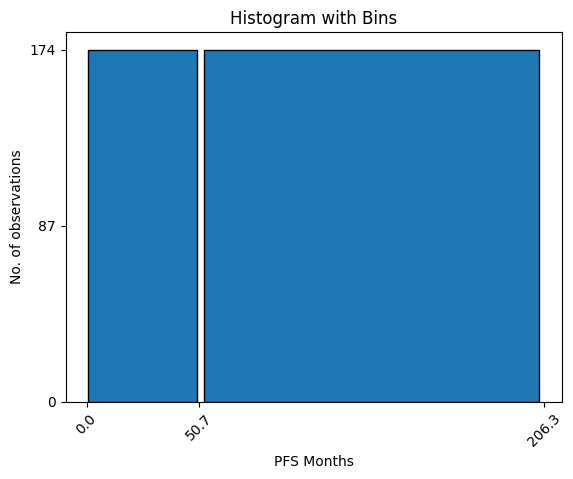

Bin 1: Interval = 0.03 to 50.66, Count = 174.0
Bin 2: Interval = 50.66 to 206.29, Count = 174.0
Training features shape: (278, 87)
Testing features shape: (70, 87)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.8571
F1 Score: 0.8567
Classifier: Decision Tree
Accuracy: 0.8857
F1 Score: 0.8853
Classifier: Random Forest
Accuracy: 0.8714
F1 Score: 0.8708
Classifier: Support Vector Machine
Accuracy: 0.5286
F1 Score: 0.4715
Classifier: K-Nearest Neighbors
Accuracy: 0.5286
F1 Score: 0.5285


/Users/sanjuktabaruah/opt/anaconda3/envs/colorectal/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Naive Bayes
Accuracy: 0.8000
F1 Score: 0.7958
Running experiment with 3 bins


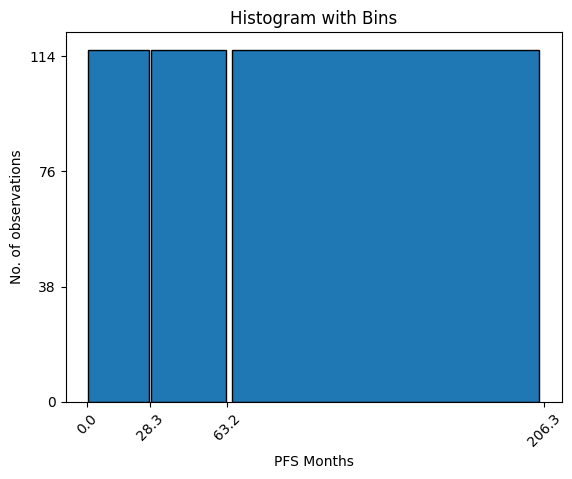

Bin 1: Interval = 0.03 to 28.26, Count = 116.0
Bin 2: Interval = 28.26 to 63.18, Count = 116.0
Bin 3: Interval = 63.18 to 206.29, Count = 116.0
Training features shape: (278, 87)
Testing features shape: (70, 87)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.8143
F1 Score: 0.8147
Classifier: Decision Tree
Accuracy: 0.8571
F1 Score: 0.8564
Classifier: Random Forest
Accuracy: 0.8000
F1 Score: 0.7971
Classifier: Support Vector Machine
Accuracy: 0.4429
F1 Score: 0.4155
Classifier: K-Nearest Neighbors
Accuracy: 0.4429
F1 Score: 0.4426
Classifier: Naive Bayes
Accuracy: 0.6429
F1 Score: 0.5979
Running experiment with 4 bins


/Users/sanjuktabaruah/opt/anaconda3/envs/colorectal/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


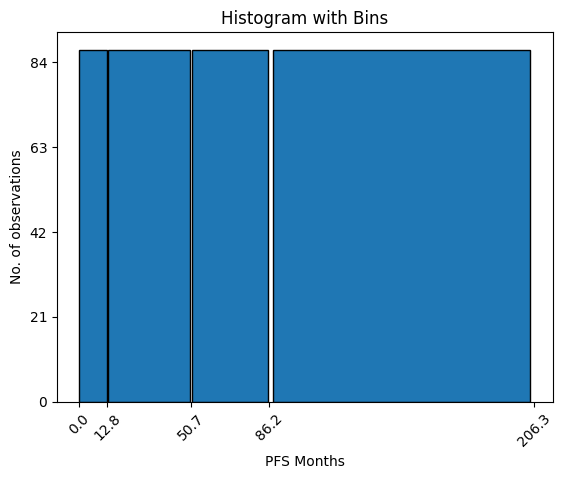

Bin 1: Interval = 0.03 to 12.78, Count = 87.0
Bin 2: Interval = 12.78 to 50.66, Count = 87.0
Bin 3: Interval = 50.66 to 86.21, Count = 87.0
Bin 4: Interval = 86.21 to 206.29, Count = 87.0
Training features shape: (278, 87)
Testing features shape: (70, 87)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.6286
F1 Score: 0.6043
Classifier: Decision Tree
Accuracy: 0.7000
F1 Score: 0.6818
Classifier: Random Forest
Accuracy: 0.7143
F1 Score: 0.6928
Classifier: Support Vector Machine
Accuracy: 0.3429
F1 Score: 0.2875
Classifier: K-Nearest Neighbors
Accuracy: 0.4143
F1 Score: 0.4239
Classifier: Naive Bayes
Accuracy: 0.5000
F1 Score: 0.4220
Experiment with 2 bins:
Classifier: Logistic Regression, Accuracy: 0.8571, F1 Score: 0.8567
Classifier: Decision Tree, Accuracy: 0.8857, F1 Score: 0.8853
Classifier: Random Forest, Accuracy: 0.8714, F1 Score: 0.8708
Classifier: Support Vector Machine, Accuracy: 0.5286, F1 Score: 0.4715
Classifier: K-Neares

/Users/sanjuktabaruah/opt/anaconda3/envs/colorectal/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


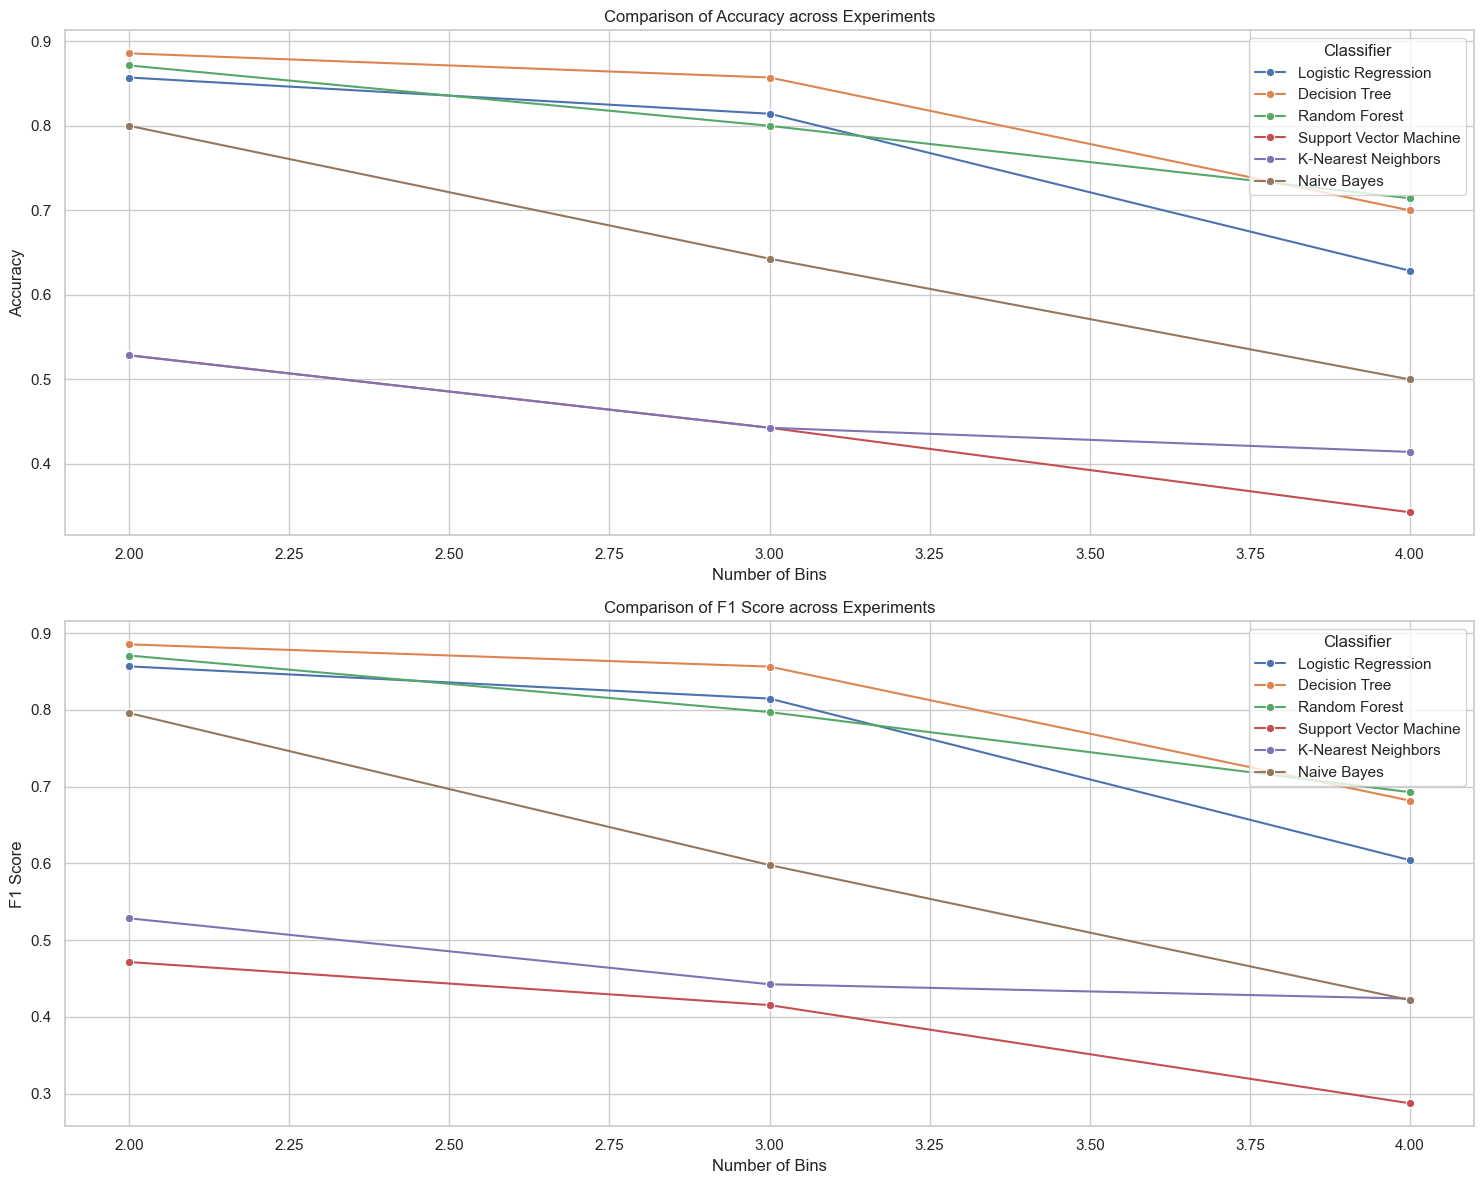

In [14]:
experiment_results = []

for num_bins in [2, 3, 4]:
    print(f"Running experiment with {num_bins} bins")
    
    # Extract the PFS (Progression-Free Survival) values
    pfs_values = patient_df['PFS_MONTHS'].dropna().values
    bin_edges = calculate_bin_edges(pfs_values, num_bins)

    # Assign class labels based on bin edges
    class_labels = assign_class_labels(pfs_values, bin_edges)

    # Split data into features (X) and labels (y)
    X = patient_df.drop(columns=['PFS_MONTHS']).values  # Assuming other features are in the DataFrame
    y = class_labels

    # Split data into training and testing sets
    ratio = 0.8  # 80% training data, 20% testing data
    x_train, x_test, y_train, y_test = split_data(X, y, ratio)

    print("Training features shape:", x_train.shape)
    print("Testing features shape:", x_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Testing labels shape:", y_test.shape)

    metrics = define_classifiers(x_train, y_train, x_test, y_test)
    experiment_results.append({
        "num_bins": num_bins,
        "metrics": metrics
    })

# Display overall results
for experiment in experiment_results:
    num_bins = experiment["num_bins"]
    metrics = experiment["metrics"]
    print(f"Experiment with {num_bins} bins:")
    for i in range(len(metrics["classifier"])):
        print(f"Classifier: {metrics['classifier'][i]}, Accuracy: {metrics['accuracy'][i]:.4f}, F1 Score: {metrics['f1_score'][i]:.4f}")
    print("="*50)

# Prepare data for plotting
plot_data = []
for experiment in experiment_results:
    num_bins = experiment["num_bins"]
    metrics = experiment["metrics"]
    for i in range(len(metrics["classifier"])):
        plot_data.append({
            "num_bins": num_bins,
            "classifier": metrics["classifier"][i],
            "accuracy": metrics["accuracy"][i],
            "f1_score": metrics["f1_score"][i]
        })

plot_df = pd.DataFrame(plot_data)

# Plot the results using seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.lineplot(data=plot_df, x="num_bins", y="accuracy", hue="classifier", marker="o", ax=axes[0])
axes[0].set_title("Comparison of Accuracy across Experiments")
axes[0].set_xlabel("Number of Bins")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Classifier")

sns.lineplot(data=plot_df, x="num_bins", y="f1_score", hue="classifier", marker="o", ax=axes[1])
axes[1].set_title("Comparison of F1 Score across Experiments")
axes[1].set_xlabel("Number of Bins")
axes[1].set_ylabel("F1 Score")
axes[1].legend(title="Classifier")

plt.tight_layout()
plt.show()